In [1]:
# imports
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import seaborn as sns
import pandas as pd
import numpy as np
import os

View the Trends of the Datasets and Use early visualizations to view any predefined patterns
df.describe shows all aggregations and std would be good to look into --> maybe separate by id and by total
view the relationship between bpm and mets to examine linearity with a sns.pairplot

compute the correlation between all the columns in the dataset
df.corr() --> plot an sns.heatmap to visualize this (<.3 low, >,.3-.7 medium correlation, +.7 high)
Use the import functions discussed in class to analyze the bias and quality of all datasets (add to presentation when speaking about synthetic dataset)

In [2]:
# set working directory 
load_dotenv()
os.chdir(os.getenv('DEFAULT_PATH'))

print('In Predictive Model Folder:', os.getcwd())

In Predictive Model Folder: C:\Users\ashly\OneDrive\Documents\Education Material\ResearchProject\MaternalHealthResearch\predictive-model


Daily Sleep and Activity Analysis

In [3]:
# set the path of the interim data files
interim_data_path = f'{os.getcwd()}/data_interim/'

# dataframe assignments
df_daily_sleep_activity = pd.read_csv(interim_data_path+'daily_sleep_activity.csv')
df_daily_sleep_activity.describe()


,id,total_sleep_records,total_minutes_asleep,total_steps,total_distance_miles,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,8541.140436,5.554479,25.188862,18.038741,216.854722,712.169492,2397.573850
std,2.060360e+09,0.345521,118.344679,4156.926990,3.070382,36.388187,22.403590,87.164687,165.957432,762.886326
min,1.503960e+09,1.000000,58.000000,17.000000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000
25%,3.977334e+09,1.000000,361.000000,5206.000000,3.000000,0.000000,0.000000,158.000000,631.000000,1850.000000
50%,4.702922e+09,1.000000,433.000000,8925.000000,6.000000,9.000000,11.000000,208.000000,717.000000,2220.000000
75%,6.962181e+09,1.000000,490.000000,11393.000000,8.000000,38.000000,27.000000,263.000000,783.000000,2926.000000
max,8.792010e+09,3.000000,796.000000,22770.000000,17.000000,210.000000,143.000000,518.000000,1265.000000,4900.000000


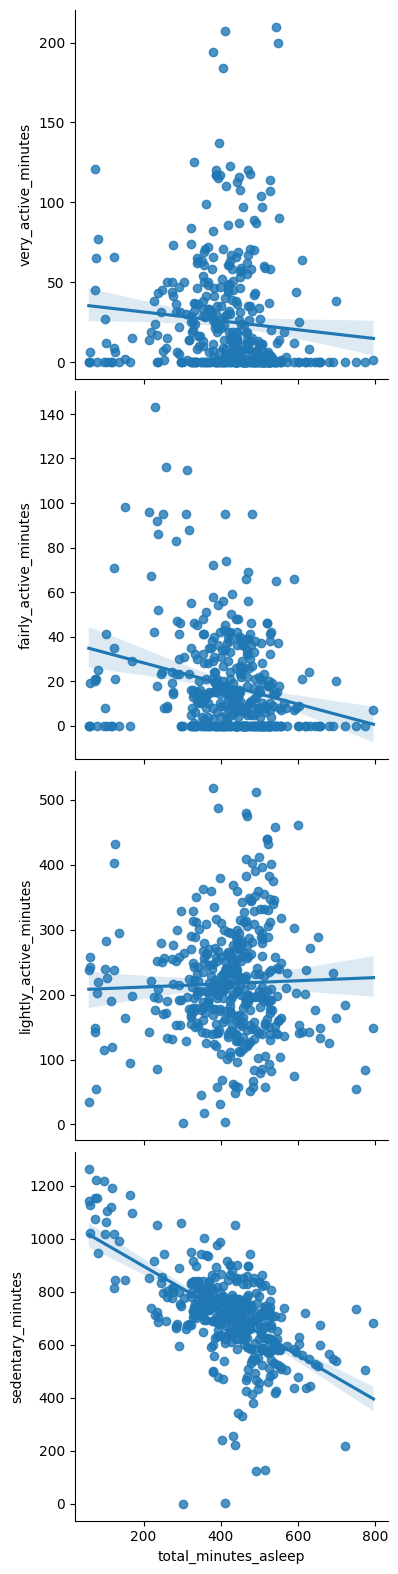

In [4]:
# examine linearity
sns.pairplot(df_daily_sleep_activity, x_vars=['total_minutes_asleep'], y_vars=['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes'], height=4, aspect=1, kind='reg')
plt.show()
# Transform this dataset due to the span of very active vs. lightly active users

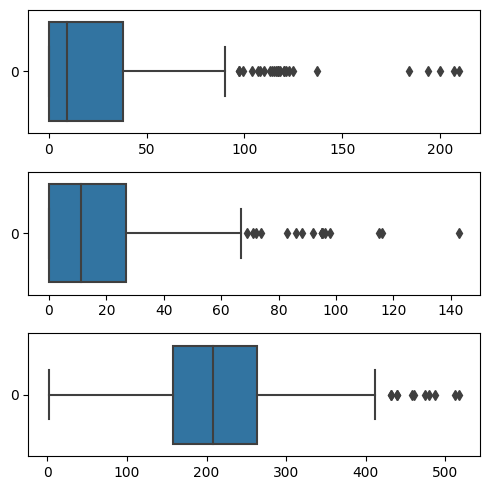

In [5]:
# examine the distribution of each independent variable
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_daily_sleep_activity['very_active_minutes'], ax = axs[0], orient='h')
plt2 = sns.boxplot(df_daily_sleep_activity['fairly_active_minutes'], ax = axs[1], orient='h')
plt3 = sns.boxplot(df_daily_sleep_activity['lightly_active_minutes'], ax = axs[2], orient='h')
plt.tight_layout()

C:\Users\ashly\AppData\Local\Temp\ipykernel_10868\1631224809.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


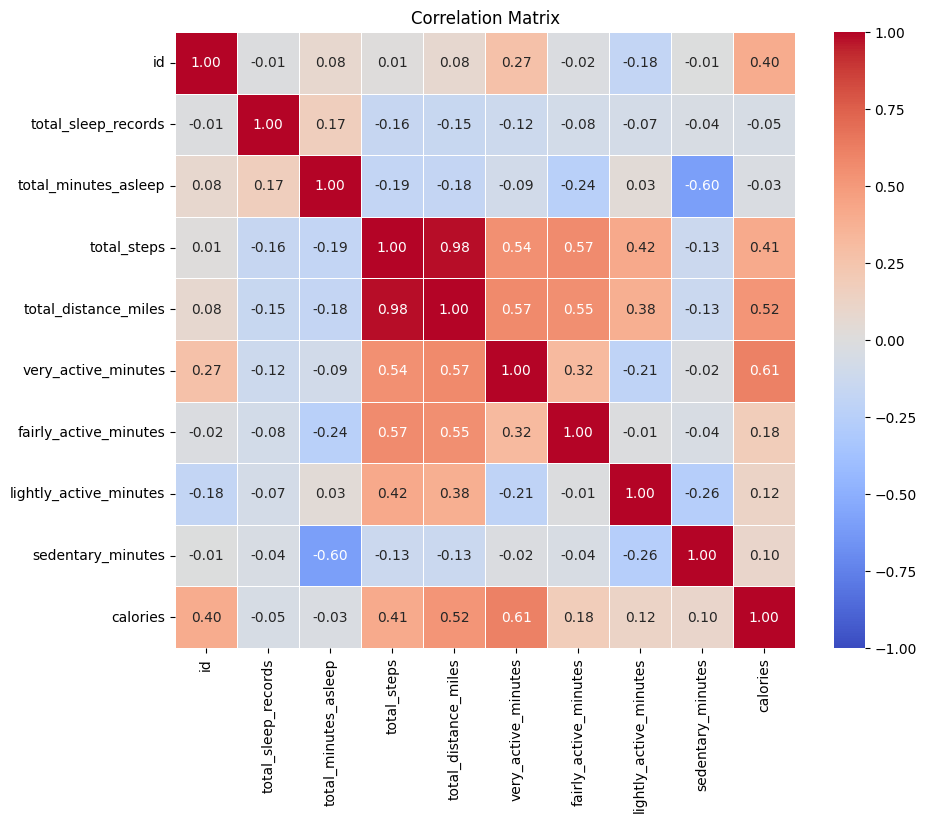

In [6]:
# Compute the correlation matrix
df = df_daily_sleep_activity#.drop(columns=['timestamp']) # temp df for correlation matrix
# print(df.head())
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Durban Watson test -- have to run the regression first!
%pip install statsmodels

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Assuming 'X' and 'y' are your independent and dependent variables, respectively
# Add a constant to X to include an intercept in the model
X = sm.add_constant(df_daily_sleep_activity['total_minutes_asleep'])
y = df_daily_sleep_activity['sedentary_minutes']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Obtain the residuals
residuals = model.resid

# Compute the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

print("Durbin-Watson statistic:", dw_stat)

Note: you may need to restart the kernel to use updated packages.
Durbin-Watson statistic: 1.7268642603906348


In [8]:
model.params

const                   36.852996
total_minutes_asleep    -0.027807
dtype: float64

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     very_active_minutes   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.006
Method:                  Least Squares   F-statistic:                     3.389
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):             0.0663
Time:                         18:01:11   Log-Likelihood:                -2068.2
No. Observations:                  413   AIC:                             4140.
Df Residuals:                      411   BIC:                             4149.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   36.8530      6.583      5.599      0.000      23.913      49.793
total_minutes_asleep    -0.0278      0.015     -1.841      0.066      -0.057       0.002
==============================================================================
Omnibus:                      205.972   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              974.006
Skew:                           2.214   Prob(JB):                    3.14e-212
Kurtosis:                       9.082   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

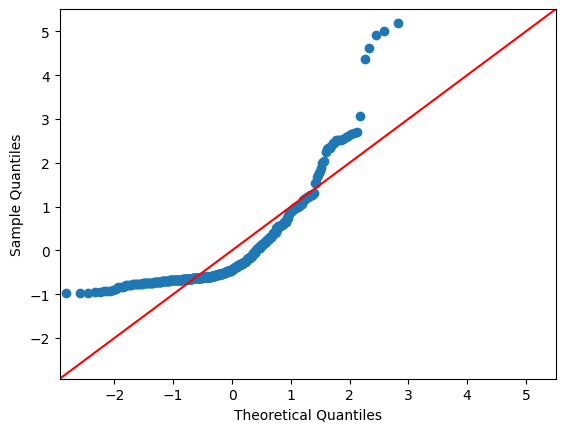

In [10]:
# Check normality of errors
ax = sm.qqplot(residuals, fit = True, line = "45")

In [22]:
import statsmodels.formula.api as smf

# multiple regression
model_mlr = smf.ols(formula='total_minutes_asleep ~ very_active_minutes + fairly_active_minutes + lightly_active_minutes + sedentary_minutes', data=df).fit()

# Obtain the residuals
residuals_mlr = model_mlr.resid

In [23]:
print(model_mlr.summary())

                             OLS Regression Results                             
Dep. Variable:     total_minutes_asleep   R-squared:                       0.453
Model:                              OLS   Adj. R-squared:                  0.447
Method:                   Least Squares   F-statistic:                     84.35
Date:                  Mon, 26 Feb 2024   Prob (F-statistic):           3.80e-52
Time:                          18:06:17   Log-Likelihood:                -2432.6
No. Observations:                   413   AIC:                             4875.
Df Residuals:                       408   BIC:                             4895.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

Heartrate Mets Merged Dataset Analysis

In [11]:
df_hr_mets_inner = pd.read_csv(interim_data_path+'heartrate_mets_merged_inner.csv')
df_hr_mets_inner.describe()

,id,mets,bpm
count,2.000730e+05,200073.000000,200073.000000
mean,5.416297e+09,18.669870,73.824809
std,1.815188e+09,15.735079,16.795436
min,2.022484e+09,10.000000,38.000000
25%,4.388162e+09,10.000000,62.000000
50%,5.553957e+09,11.000000,70.000000
75%,6.962181e+09,26.000000,83.000000
max,8.877689e+09,144.000000,203.000000


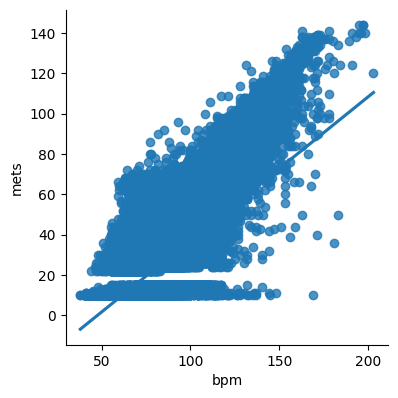

In [12]:
# examine linearity
sns.pairplot(df_hr_mets_inner, x_vars=['bpm'], y_vars=['mets'], height=4, aspect=1, kind='reg')
plt.show()

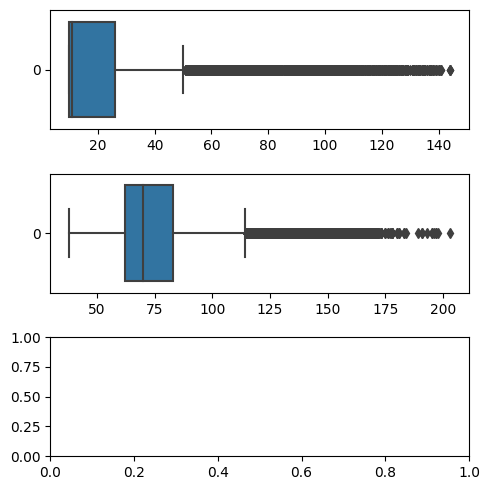

In [13]:
# examine the distribution of each independent variable
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_hr_mets_inner['mets'], ax = axs[0], orient='h')
plt2 = sns.boxplot(df_hr_mets_inner['bpm'], ax = axs[1], orient='h')
plt.tight_layout()

In [14]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
# Assuming 'X' and 'y' are your independent and dependent variables, respectively
# Add a constant to X to include an intercept in the model
X = sm.add_constant(df_hr_mets_inner['bpm'])
y = df_hr_mets_inner['mets']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Obtain the residuals
residuals = model.resid

# Compute the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 0.5892147781505663


In [15]:
model.params

const   -33.852589
bpm       0.711447
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mets   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                 2.725e+05
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:01:35   Log-Likelihood:            -7.4928e+05
No. Observations:              200073   AIC:                         1.499e+06
Df Residuals:                  200071   BIC:                         1.499e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8526      0.103   -328.102      0.000     -34.055     -33.650
bpm            0.7114      0.001    522.059      0.000       0.709       0.714
==============================================================================
Omnibus:                    28685.567   Durbin-Watson:                   0.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77219.841
Skew:                           0.793   Prob(JB):                         0.00
Kurtosis:                       5.598   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""